In [193]:
#Libraries for data manuplation
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #Visualization of missing data

#Visualization aesthetics
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize']=(10,6)        

In [195]:
#Loading the dataset
df=pd.read_csv('NetFlix.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [163]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...
7786,s999,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,6-Dec-16,2016,TV-MA,81,"Dramas, Independent Movies, Romantic Movies",Two former high school sweethearts unexpectedl...


In [165]:
#EDA
df.shape

(7787, 12)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [169]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

<Axes: >

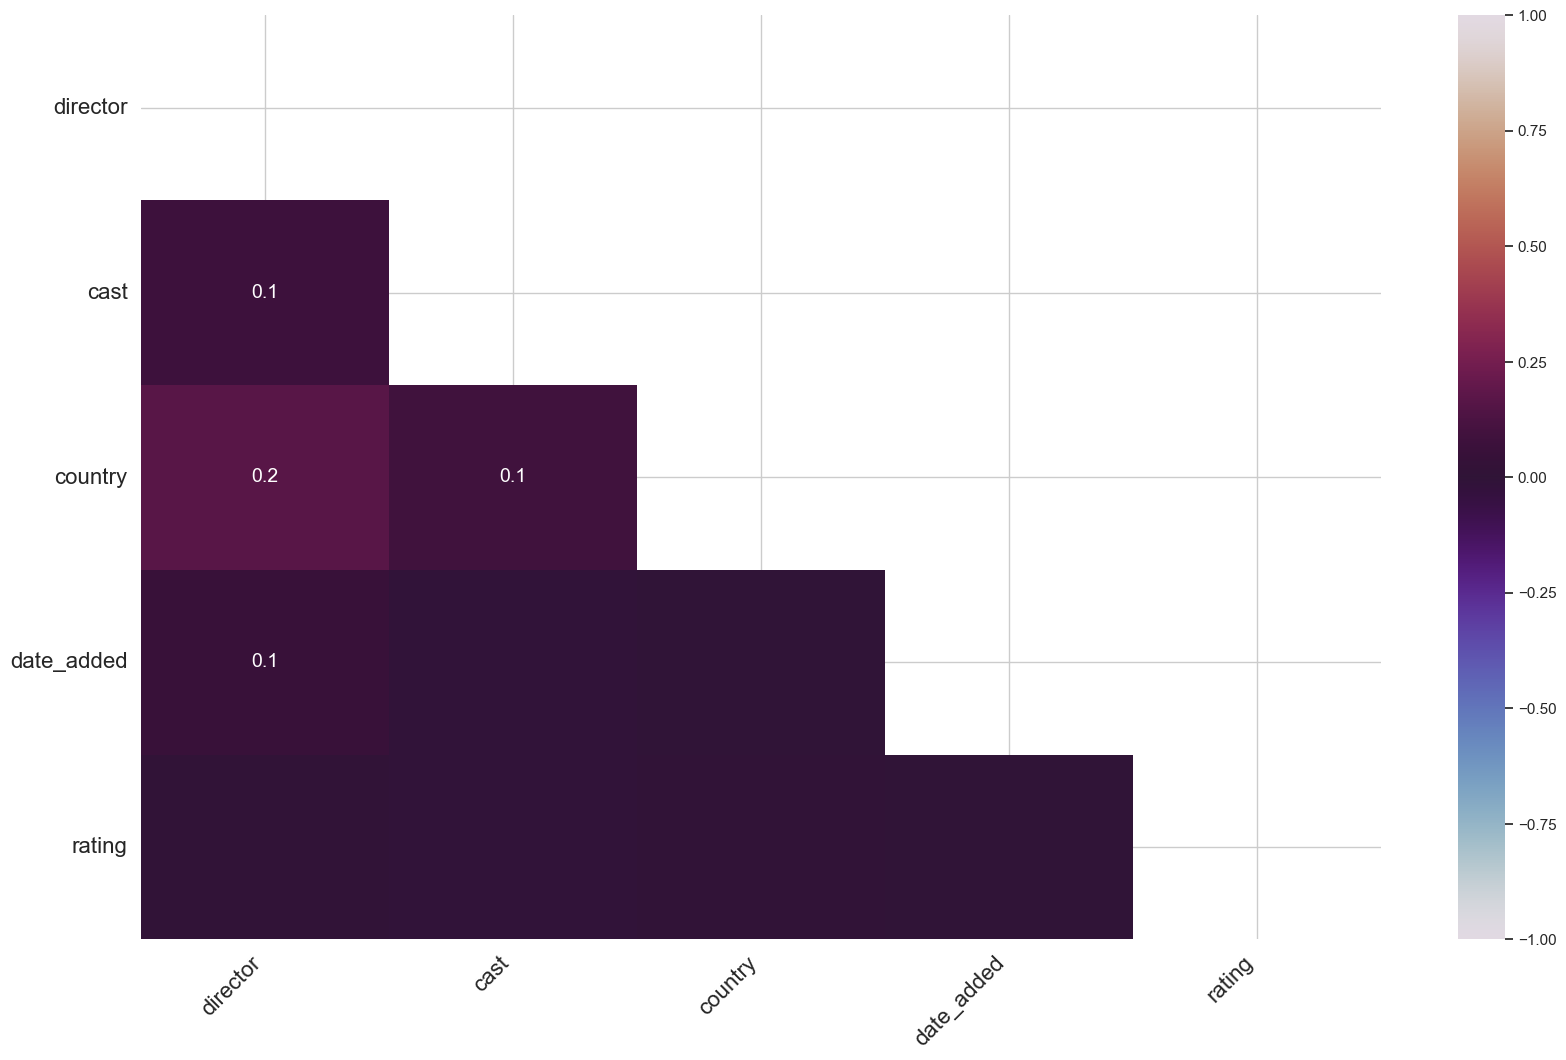

In [171]:
msno.heatmap(df,cmap='twilight')

In [173]:
#count and remove duplicate rows
df.duplicated().sum()
df=df.drop_duplicates()

In [175]:
#Insights and queries
#content distribution(movies vs TV Shows)
import pandas as pd

data={
    'type': ['Movie', 'TV Show'],
    'count': [150, 50]
}
df=pd.DataFrame(data)

df['percentage']=df['count']/df['count'].sum()
mf_ratio=df.set_index('type')

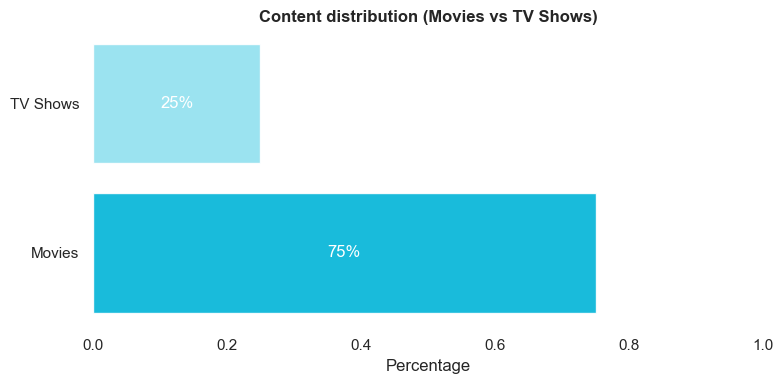

In [177]:
import matplotlib.pyplot as plt

#Data for plotting
labels=['Movies','TV Shows']
movies=mf_ratio.loc['Movie', 'percentage']
tv_shows=mf_ratio.loc['TV Show', 'percentage']

#fig and axis
fig,ax=plt.subplots(figsize=(8,4))

#Horizontal bar chart
ax.barh(labels,[movies,tv_shows],color=['#00B4D8','#90E0EF'],alpha=0.9)

#setting the limits and labels
ax.set_xlim(0,1)
ax.set_xlabel('Percentage')
ax.set_title('Content distribution (Movies vs TV Shows)',fontweight='bold')

#percentage annotations
ax.annotate(f"{int(movies*100)}%",xy=(movies/2,0),va='center',
            ha='center',fontsize=12,color='white')
ax.annotate(f"{int(tv_shows*100)}%",xy=(tv_shows/2,1),va='center',
            ha='center',fontsize=12,color='white')

#Remove grid lines
ax.grid(False)

#Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

#Show the plot
plt.tight_layout()
plt.show()

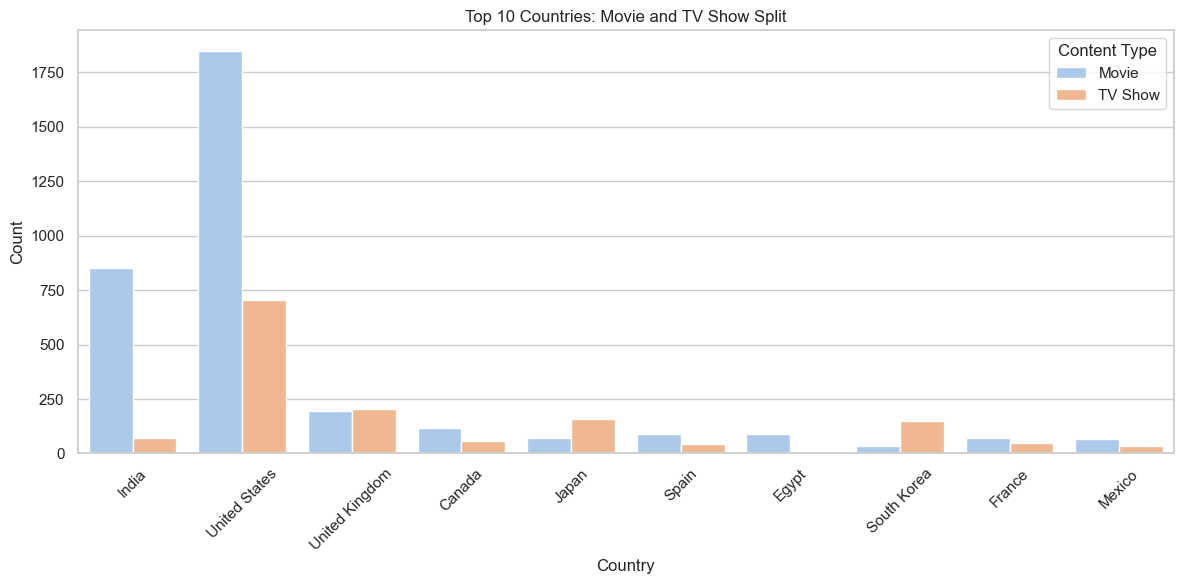

In [197]:
#top 10 countries with the most content 
top_countries = df['country'].value_counts().nlargest(10)
top_countries_df = df[df['country'].isin(top_countries.index)]

# Stacked Bar Chart for Top 10 Countries
plt.figure(figsize=(12, 6))
sns.countplot(data=top_countries_df, x='country', hue='type', palette='pastel')
plt.title("Top 10 Countries: Movie and TV Show Split")
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.tight_layout()  # Adjust layout
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_5428\3079133417.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year']=pd.to_datetime(df['date_added'],errors='coerce').dt.year


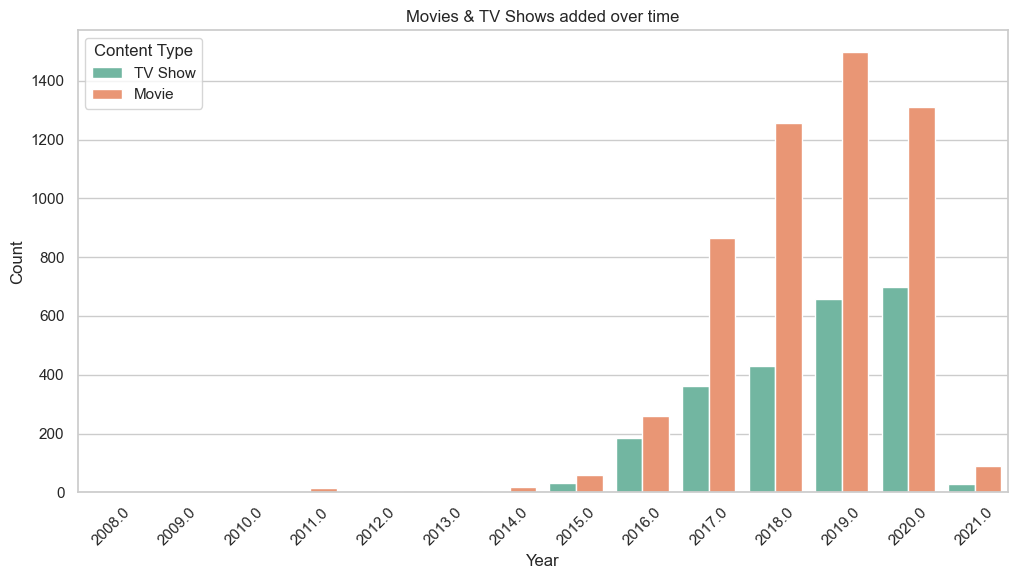

In [199]:
#Content added over time
#extracting year from the date_added column
df['Year']=pd.to_datetime(df['date_added'],errors='coerce').dt.year
yearly_content=df['Year'].value_counts().sort_index()

#Column chart 
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Year',hue='type',palette='Set2')
plt.title("Movies & TV Shows added over time")
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_5428\4199740844.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_ratings_dist.index, y=age_ratings_dist.values, palette='twilight')


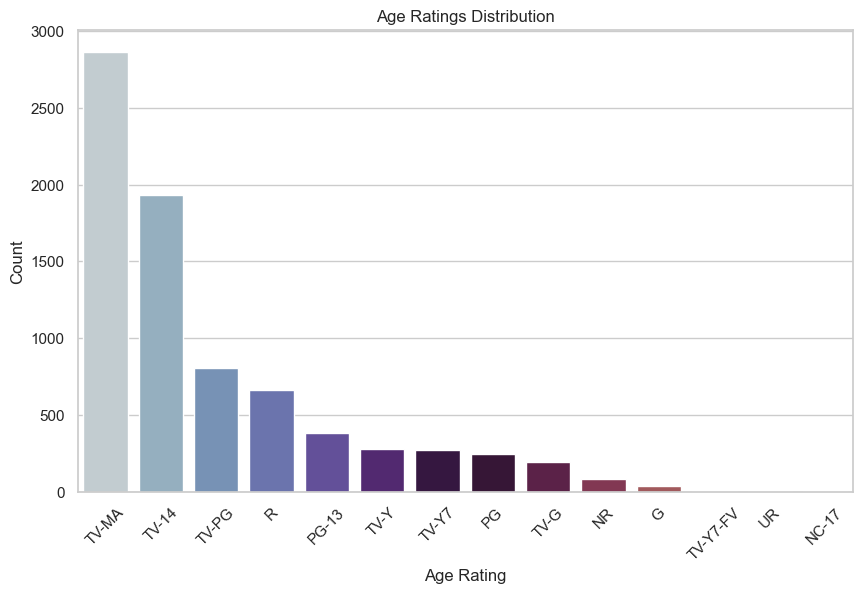

In [201]:
#Age demographics
#age rating distribution
age_ratings_dist = df['rating'].value_counts()

# Column Chart for Age Ratings Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratings_dist.index, y=age_ratings_dist.values, palette='twilight')
plt.title("Age Ratings Distribution")
plt.xlabel('Age Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

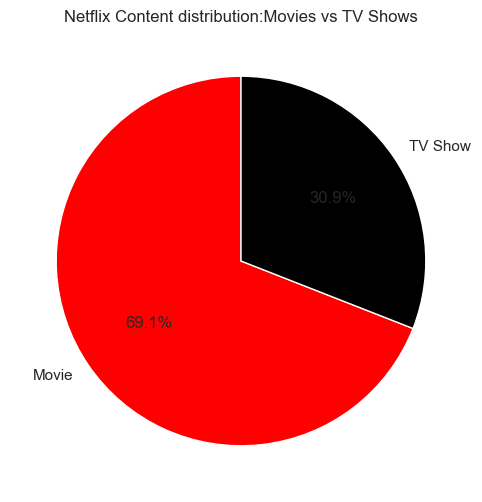

In [203]:
#Visualizations
#1.Content distribution over category

#Pie chart-Movie & TV distribution
df['type'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['red','black'])
plt.title("Netflix Content distribution:Movies vs TV Shows")
plt.ylabel('')
plt.show()                                   

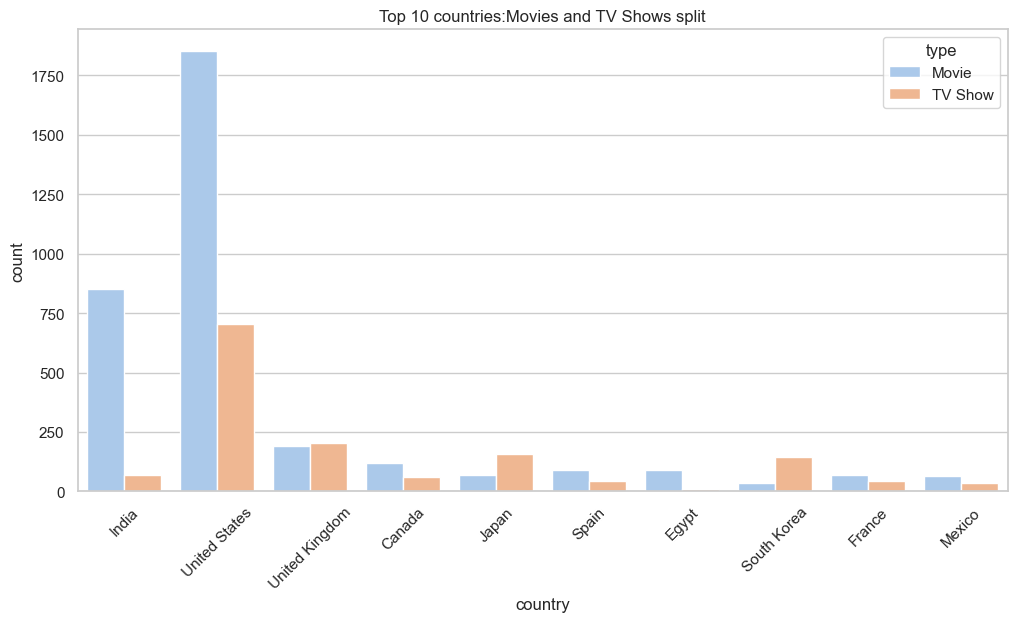

In [205]:
#2.Content by country(top 10)

#stacked bar chart for top 10 countries
plt.figure(figsize=(12,6))
sns.countplot(data=top_countries_df,x='country',hue='type',palette='pastel')
plt.title("Top 10 countries:Movies and TV Shows split")
plt.xticks(rotation=45)
plt.show()

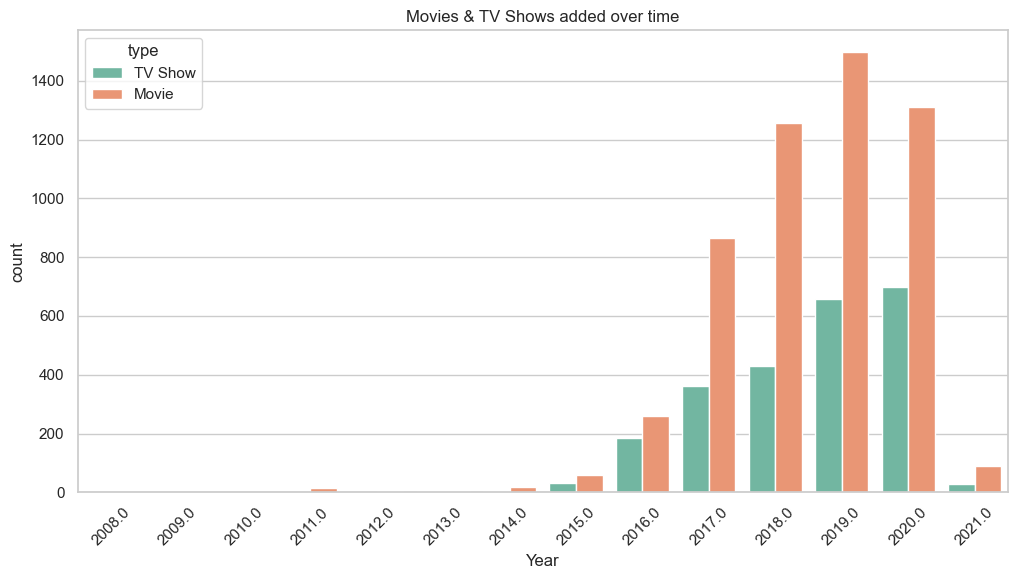

In [207]:
#content added over time
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Year',hue='type',palette='Set2')
plt.title("Movies & TV Shows added over time")
plt.xticks(rotation=45)
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_5428\1217453835.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month']=pd.to_datetime(df['date_added'],errors='coerce').dt.month


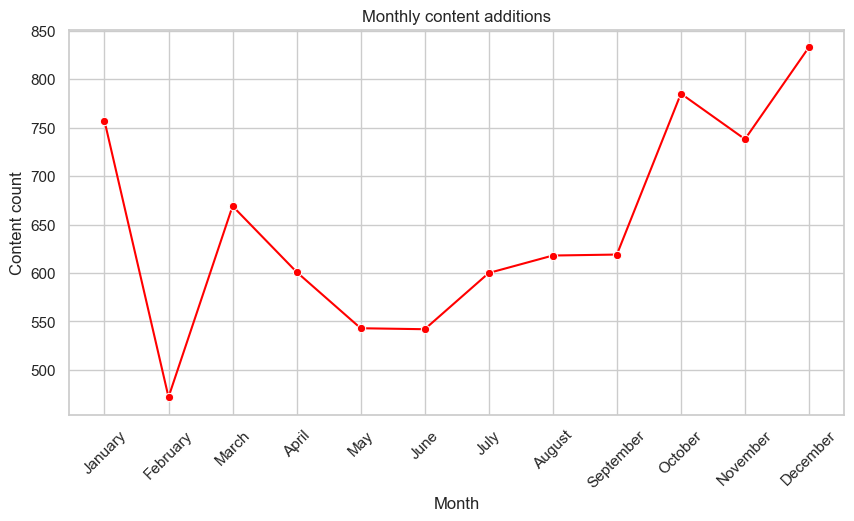

In [209]:
#Monthly content additions

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

#extract month from release date
df['Month']=pd.to_datetime(df['date_added'],errors='coerce').dt.month
monthly_content=df.groupby('Month').size()

#Monthly content additions
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_content.index,y=monthly_content.values,marker='o',color='red')
plt.title("Monthly content additions")
plt.xlabel("Month")
plt.ylabel("Content count")

#setting the x-ticks to be the month names instead of numbers
month_names=[calendar.month_name[i] for i in range(1,13)]
plt.xticks(monthly_content.index,month_names,rotation=45)

plt.show()

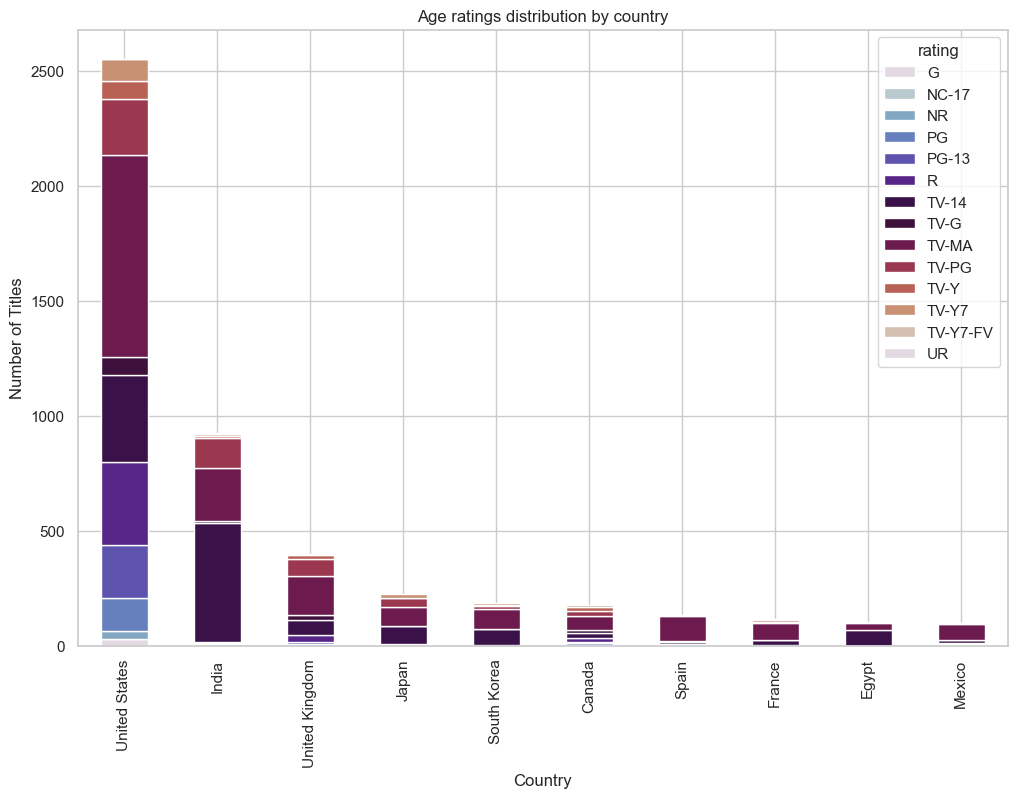

In [211]:
#Age ratings distribution by country

import pandas as pd
import matplotlib.pyplot as plt

#Age ratings distribution by country
age_ratings_by_country=df.groupby(['country','rating']).size().unstack().fillna(0)

#check with top countries in the age ratings data
valid_top_countries=top_countries.index[top_countries.index.isin(age_ratings_by_country.index)]

#plot the data for valid top countries only
age_ratings_by_country.loc[valid_top_countries].plot(kind='bar',stacked=True,colormap='twilight',figsize=(12,8))
plt.title("Age ratings distribution by country")
plt.ylabel("Number of Titles")
plt.xlabel("Country")
plt.show()

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data={
    'title':['Movie1','Movie2','Movie3','Movie4','Movie5'],
    'genres':['Action,Comedy','Comedy','Action,Drama','Drama','Action,Thriller']
}
df=pd.DataFrame(data)

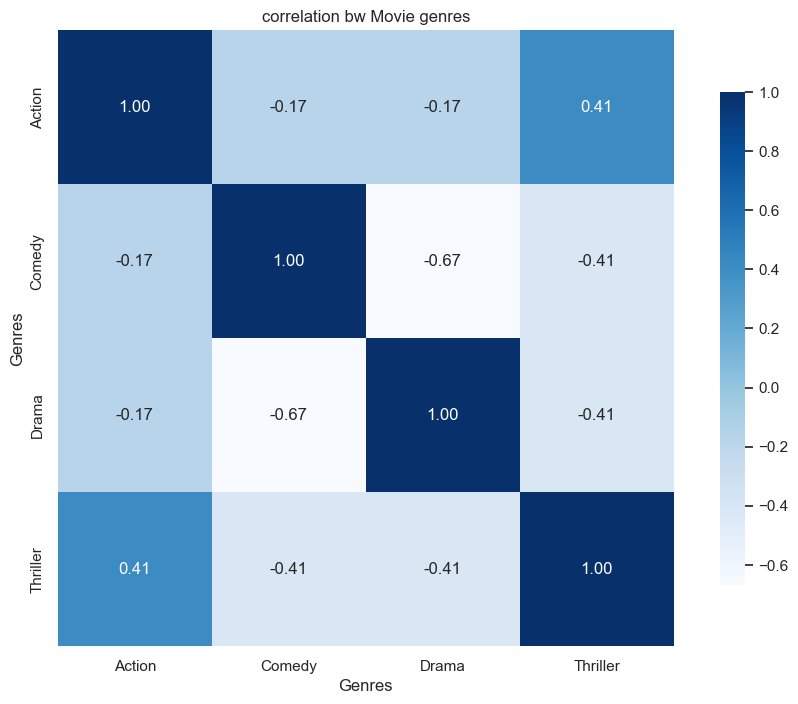

In [191]:
#creating dummy variables for the genres
genre_dummies=df['genres'].str.get_dummies(sep=',')

#Compute the correlation matrix
corr_matrix=genre_dummies.corr()

#set up matplotlib fig
plt.figure(figsize=(12,8))

#creting heatmap for coorelation matrix
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='Blues',square=True,cbar_kws={"shrink":.8})

plt.title('correlation bw Movie genres')
plt.xlabel('Genres')
plt.ylabel('Genres')
plt.show()

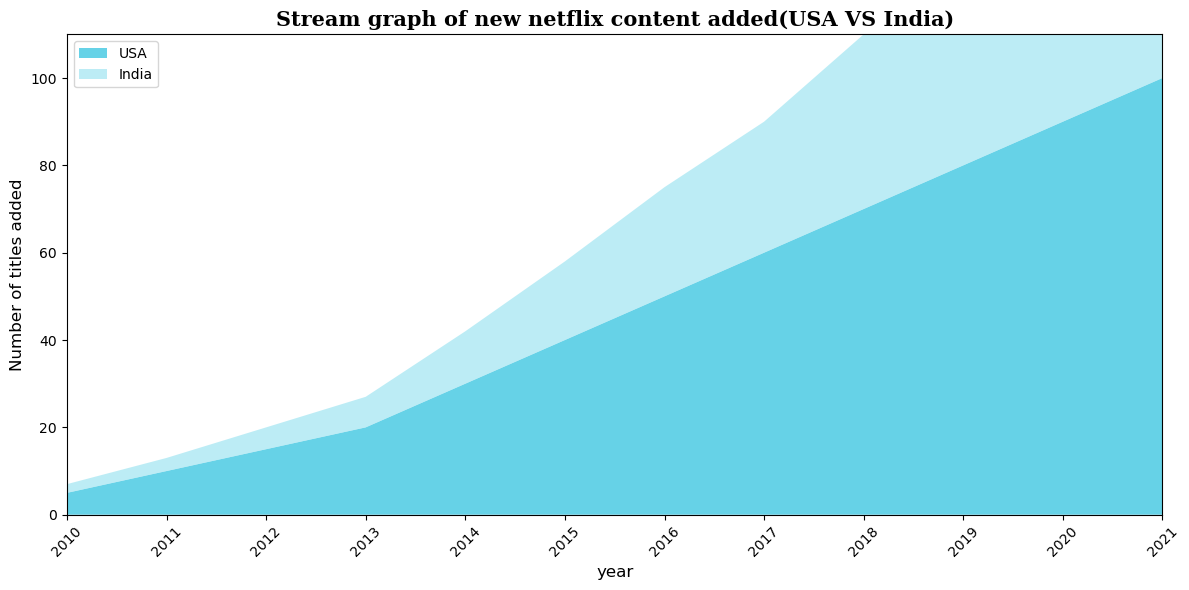

In [83]:
#Advanced insights and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

years=list(range(2010,2022))
usa_content=[5,10,15,20,30,40,50,60,70,80,90,100]
india_content=[2,3,5,7,12,18,25,30,40,55,70,80]

data={
    'year_added':years,
     'USA':usa_content,
    'India':india_content
}
us_ind=pd.DataFrame(data)

us_ind.set_index('year_added',inplace=True)

fig,ax=plt.subplots(figsize=(12,6))
colors=['#00B4D8','#90E0EF']

ax.stackplot(us_ind.index,us_ind['USA'],us_ind['India'],labels=us_ind.columns,colors=colors,alpha=0.6)

ax.set_title('Stream graph of new netflix content added(USA VS India)',fontsize=15,fontweight='bold',fontfamily='serif')
ax.set_xlabel('year',fontsize=12)
ax.set_ylabel('Number of titles added',fontsize=12)
ax.legend(loc='upper left')
ax.set_xlim(us_ind.index.min(),us_ind.index.max())
ax.set_ylim(0,us_ind.values.max() +10)

plt.xticks(us_ind.index,rotation=45)

plt.tight_layout()
plt.show()

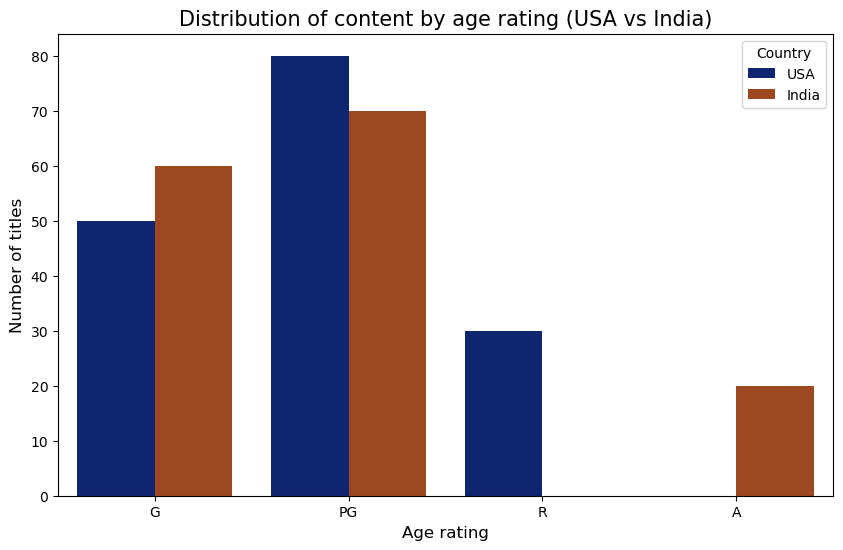

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'country':['USA','USA','USA','India','India','India'],
    'age_rating':['G','PG','R','G','PG','A'],
    'count':[50,80,30,60,70,20]
}
df=pd.DataFrame(data)

plt.figure(figsize=(10,6))
sns.barplot(data=df,x='age_rating',y='count',hue='country',palette='dark')
plt.title('Distribution of content by age rating (USA vs India)',fontsize=15)
plt.xlabel('Age rating',fontsize=12)
plt.ylabel('Number of titles',fontsize=12)
plt.legend(title='Country')
plt.show()

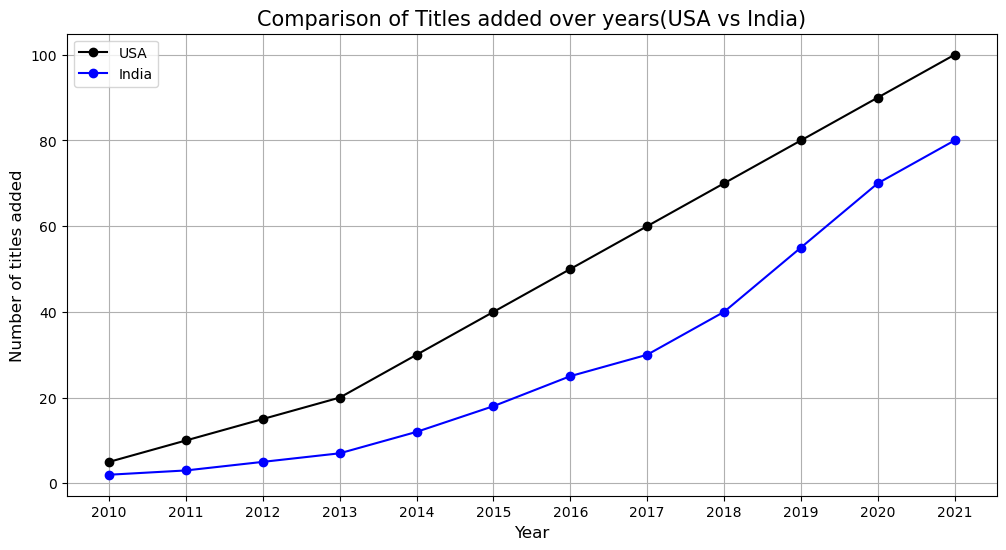

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#simulated data for titles added per year from 2010 to 2011
years=list(range(2010,2022))
usa_titles=[5,10,15,20,30,40,50,60,70,80,90,100]
india_titles=[2,3,5,7,12,18,25,30,40,55,70,80]

comparison_data=pd.DataFrame({
    'year':years,
    'USA':usa_titles,
    'India':india_titles
})

plt.figure(figsize=(12,6))
plt.plot(comparison_data['year'],comparison_data['USA'],marker='o',label='USA',color='black')
plt.plot(comparison_data['year'],comparison_data['India'],marker='o',label='India',color='blue')
plt.title('Comparison of Titles added over years(USA vs India)',fontsize=15)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of titles added',fontsize=12)
plt.xticks(years)
plt.legend()
plt.grid()
plt.show()

In [41]:
#Finding the maximum duration
max_duration = df['duration'].max()
max_duration



312

In [49]:
#Count of movies in India with TV-14 rating
tv_14_canada = df[(df['rating'] == 'TV-14') & (df['country'] == 'India') & (df['type'] == 'Movie')]
len(tv_14_canada)

497

In [45]:
#Country with most TV Shows
country_tv_shows = df[df['type'] == 'TV Show']['country'].value_counts().idxmax()
country_tv_shows
     

'United States'

In [53]:
#Country with most movies
country_movie= df[df['type'] == 'Movie']['country'].value_counts().idxmax()
country_movie

'United States'